In [1]:
import torch
from torch import nn

In [3]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()

torch.Size([2, 1, 3])

In [6]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [7]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [8]:
dims = [-(i + 1) for i in range(len(parameter_shape))]

In [9]:
dims

[-1, -2]

In [10]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [11]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [12]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [13]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [14]:
out = gamma * y + beta

In [15]:
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [16]:
import torch
from torch import nn

class LayerNormalisation():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta = nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) **2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Std dev. \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out

In [17]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-0.3255,  2.3684, -0.1862, -1.5219,  0.5665, -2.3847,  1.0601,
           0.7629],
         [ 0.2842, -0.4535,  0.2230, -0.5993, -0.3207, -0.6524, -1.3803,
           0.5488],
         [-0.2570, -0.4533, -1.1477,  0.3530,  0.0978,  0.5543, -0.9577,
          -1.2173]],

        [[ 2.4313,  1.5121, -1.2811, -2.5288, -0.8029, -0.1266, -1.7924,
          -1.1994],
         [-0.9195, -1.8325, -0.6753, -0.6157,  0.5800,  0.0426,  0.2900,
          -1.3099],
         [-1.6269,  0.5670, -1.3035,  0.4130,  0.1059, -0.1012,  1.1593,
           0.8161]],

        [[ 1.1722, -0.2196,  0.8645,  1.3202,  0.1041, -0.3886,  1.3133,
          -0.2971],
         [ 0.6202,  0.3180, -0.0612, -1.4668, -0.4203, -0.8620,  0.2307,
          -0.2194],
         [ 1.4339, -0.3177, -0.7777,  1.8298,  0.1266, -0.8348, -1.5247,
           0.9649]],

        [[ 0.0407,  0.5584,  0.5419,  2.3747,  0.9390, -1.0431, -0.8758,
           0.2208],
         [-0.2040,  0.7450, 

In [19]:
layer_norm = LayerNormalisation(inputs.size()[-1:])

In [20]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[ 0.0425],
         [-0.2938],
         [-0.3785]],

        [[-0.4735],
         [-0.5550],
         [ 0.0037]],

        [[ 0.4836],
         [-0.2326],
         [ 0.1125]],

        [[ 0.3446],
         [-0.1443],
         [-0.1281]],

        [[-0.2319],
         [ 0.1559],
         [ 0.5182]]])
Std dev. 
 (torch.Size([5, 3, 1])): 
 tensor([[[1.4038],
         [0.5852],
         [0.6406]],

        [[1.5713],
         [0.7675],
         [0.9266]],

        [[0.7085],
         [0.6353],
         [1.1168]],

        [[1.0051],
         [0.5930],
         [0.7099]],

        [[0.5080],
         [1.2940],
         [1.4196]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-0.2621,  1.6569, -0.1629, -1.1144,  0.3733, -1.7290,  0.7250,
           0.5132],
         [ 0.9877, -0.2730,  0.8830, -0.5220, -0.0460, -0.6128, -1.8567,
           1.4397],
         [ 0.1896, -0.1168, -1.2007,  1.1419,  0.7435,  1.4560, -0.9042,
          -1.3094]],

        [[

In [21]:
out[0].mean(), out[0].std()

(tensor(-1.4901e-08, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))

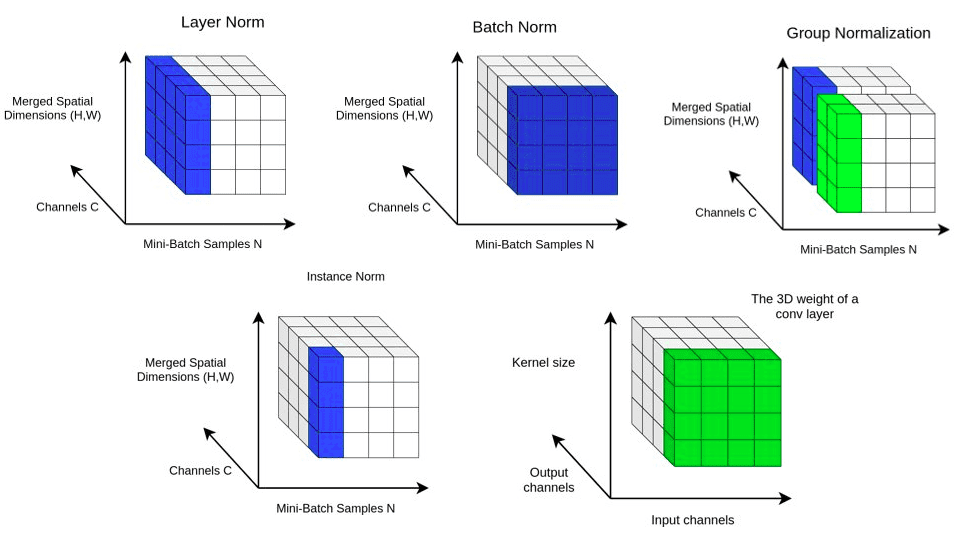

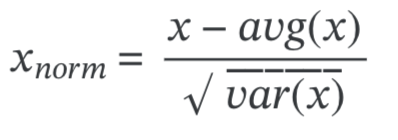